In [24]:
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/adit/Downloads/archive/fraudTrain.csv")

In [ ]:
print(df.head())
print(df.info())
print(df.describe())
print(df.columns)
print(df.shape())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [26]:
df.isnull().sum()
print(df.isna().sum())

df = df.dropna()
print(df)


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
         Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:

In [27]:
df.info()
df['is_fraud'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64

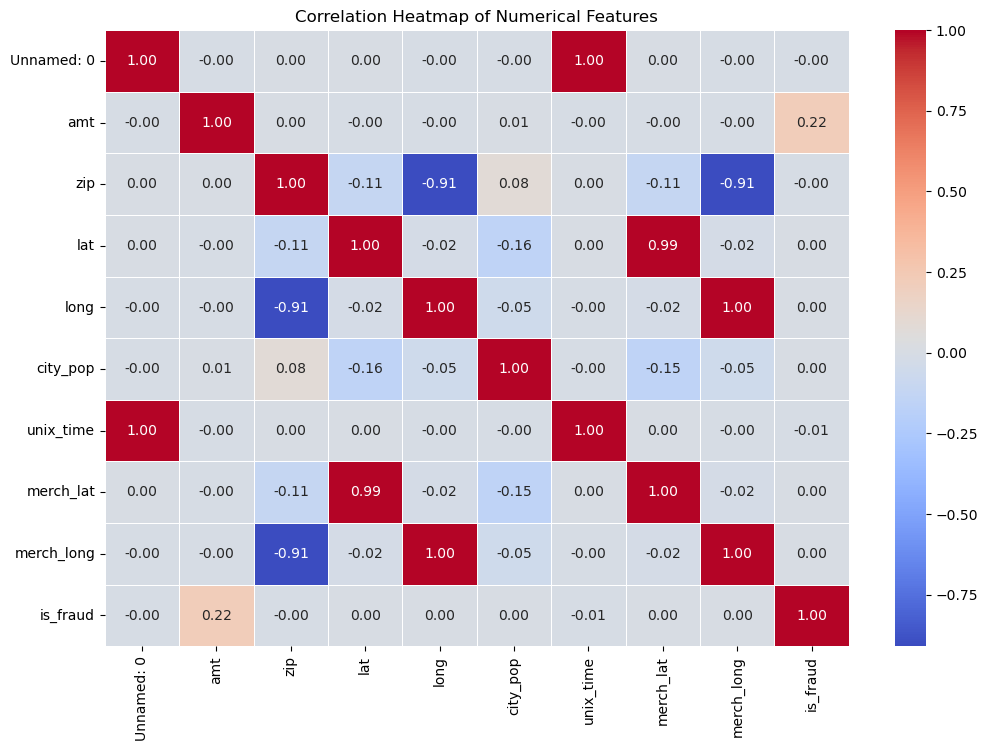

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['cc_num'] = df['cc_num'].astype(str)

numeric_df = df.select_dtypes(include=['float64', 'int64'])

numeric_df = numeric_df.dropna()

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [34]:
columns_to_drop = ['first', 'last', 'street', 'city', 'state', 'lat', 'long', 'dob',
                   'job', 'unix_time', 'trans_num', 'merch_lat', 'merch_long', 'Unnamed: 0', 'trans_date_trans_time', 'merchant']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [35]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

categorical_cols = ['gender', 'category']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [36]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [39]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba),
        "Classification Report": classification_report(y_test, y_pred, zero_division=0),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "ROC Data": roc_curve(y_test, y_proba)
    }


In [40]:
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"ROC AUC: {metrics['ROC AUC']:.4f}")
    print("Classification Report:\n", metrics['Classification Report'])
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])


Model: Logistic Regression
Accuracy: 0.9937
F1 Score: 0.0000
ROC AUC: 0.8333
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    386751
           1       0.00      0.00      0.00      2252

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003

Confusion Matrix:
 [[386537    214]
 [  2252      0]]

Model: Random Forest
Accuracy: 0.9971
F1 Score: 0.7277
ROC AUC: 0.9646
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.81      0.66      0.73      2252

    accuracy                           1.00    389003
   macro avg       0.90      0.83      0.86    389003
weighted avg       1.00      1.00      1.00    389003

Confusion Matrix:
 [[386391    360]
 [   758   1494]]

Model: Naive Bayes
Accuracy: 0.9878
F1 

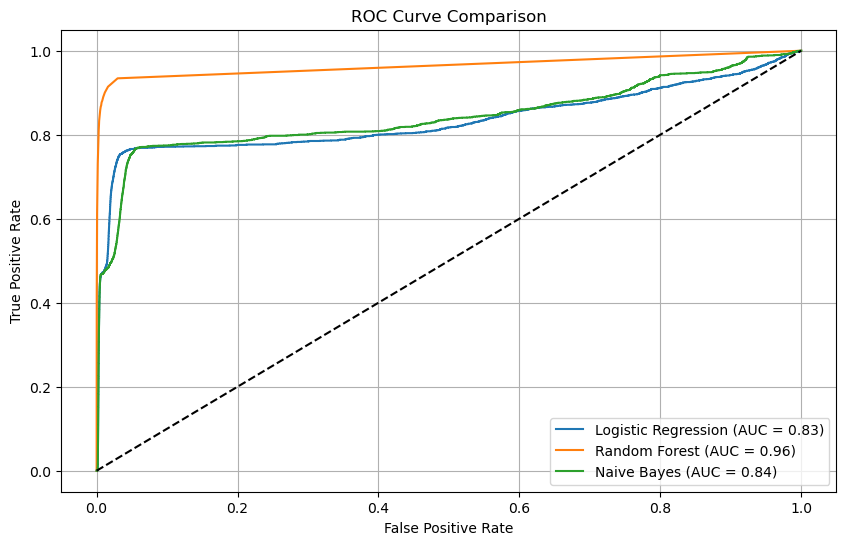

In [41]:
plt.figure(figsize=(10, 6))
for name, metrics in results.items():
    fpr, tpr, _ = metrics["ROC Data"]
    plt.plot(fpr, tpr, label=f"{name} (AUC = {metrics['ROC AUC']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

In [65]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

test_df = pd.read_csv("/Users/adit/Downloads/archive/fraudTest2.csv")

columns_to_drop = ['first', 'last', 'street', 'city', 'state', 'lat', 'long', 'dob',
                   'job', 'unix_time', 'trans_num', 'merch_lat', 'merch_long', 'Unnamed: 0', 'merchant']
test_df = test_df.drop(columns=[col for col in columns_to_drop if col in test_df.columns])

cat_cols = ['category', 'gender']
for col in cat_cols:
    le = LabelEncoder()
    le.fit(df[col].astype(str))
    test_df[col] = test_df[col].astype(str).apply(lambda x: x if x in le.classes_ else 'unknown')
    if 'unknown' not in le.classes_:
        le.classes_ = np.append(le.classes_, 'unknown')
    test_df[col] = le.transform(test_df[col])

test_df = test_df.dropna()

if 'is_fraud' in test_df.columns:
    y_true = test_df['is_fraud']
    X_test_final = test_df.drop(['is_fraud', 'trans_date_trans_time'], axis=1, errors='ignore')
else:
    y_true = None
    X_test_final = test_df.drop(['trans_date_trans_time'], axis=1, errors='ignore')

X_test_final_scaled = scaler.transform(X_test_final)

for name, model in models.items():
    y_pred = model.predict(X_test_final_scaled)
    y_proba = model.predict_proba(X_test_final_scaled)[:, 1]

    print(f"\n📌 Model: {name}")
    if y_true is not None:
        print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
        print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
        print(f"ROC AUC: {roc_auc_score(y_true, y_proba):.4f}")
        print("Classification Report:\n", classification_report(y_true, y_pred, zero_division=0))
        print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    else:
        print("Predictions:", y_pred[:10])
        print("Probabilities:", y_proba[:10])



📌 Model: Logistic Regression
Accuracy: 0.9954
F1 Score: 0.0000
ROC AUC: 0.8234
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Confusion Matrix:
 [[553165    409]
 [  2145      0]]

📌 Model: Random Forest
Accuracy: 0.9958
F1 Score: 0.0000
ROC AUC: 0.7111
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Confusion Matrix:
 [[553397    177]
 [  2145      0]]

📌 Model: Naive Bayes
Accuracy: 0.98

In [77]:
import random

random_index = random.randint(0, len(X_test_final_scaled) - 1)
single_sample_scaled = X_test_final_scaled[random_index].reshape(1, -1)

print("\n🔍 Sample Transaction:")
print(X_test_final.iloc[random_index])

best_model_name = 'Random Forest'
best_model = models[best_model_name]

is_fraud = best_model.predict(single_sample_scaled)[0]
fraud_prob = best_model.predict_proba(single_sample_scaled)[0][1]

print(f"\n🔎 Prediction by {best_model_name}: {'FRAUD' if is_fraud == 1 else 'NOT FRAUD'}")
print(f"💡 Probability of Fraud: {fraud_prob:.4f}")



🔍 Sample Transaction:
cc_num      4.769427e+18
category    1.400000e+01
amt         1.225000e+01
gender      2.000000e+00
zip         1.705800e+04
city_pop    1.909000e+03
Name: 120997, dtype: float64

🔎 Prediction by Random Forest: NOT FRAUD
💡 Probability of Fraud: 0.0600
